In [2]:
# import library used for data management
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif

In [3]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data.csv


In [4]:
# load datasets
import io
df = pd.read_csv(io.BytesIO(uploaded['application_data.csv']))

In [5]:
# to view the data set
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# to view training set information about the rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Missing Value

In [43]:
# check missing value
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [44]:
df_missing_value = 100*df.isnull().sum()/len(df)
#df_missing_value[df_missing_value>=50]

In [45]:
df_missing_value_col=df_missing_value[df_missing_value>=50]

In [46]:
# df_missing_value
# len(df)
nan_cols = [i for i in df.columns if df[i].isnull().any()]
len(nan_cols)

67

In [47]:
# drop missing value with more than 50 percent
df_1 = df.drop(columns=df_missing_value_col.index)
df_1.shape

(307511, 81)

In [48]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### Object

Dummy

In [49]:
dummy_list = [1, 2, 3, 4, 10, 11, 12, 13, 14, 26, 30, 38, 48]
col_list = []
for i in dummy_list:
    col_list.append(df_1.columns[i])
    
print(col_list)

# Get Dummy 
df_dummy =pd.get_dummies(df_1, columns=col_list)

df_dummy

# df_1 = pd.get_dummies(df_1, columns=col_list, drop_first = True)


['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TOTALAREA_MODE']


,SK_ID_CURR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,TOTALAREA_MODE_0.9629,TOTALAREA_MODE_0.9712,TOTALAREA_MODE_0.9746,TOTALAREA_MODE_0.9749,TOTALAREA_MODE_0.975,TOTALAREA_MODE_0.979,TOTALAREA_MODE_0.992,TOTALAREA_MODE_0.9931,TOTALAREA_MODE_0.9973,TOTALAREA_MODE_1.0
0,100002,Y,0,202500.0,406597.5,24700.5,House / apartment,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,N,0,270000.0,1293502.5,35698.5,House / apartment,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,Y,0,67500.0,135000.0,6750.0,House / apartment,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,Y,0,135000.0,312682.5,29686.5,House / apartment,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,Y,0,121500.0,513000.0,21865.5,House / apartment,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,N,0,157500.0,254700.0,27558.0,With parents,0.032561,-9327,-236,...,0,0,0,0,0,0,0,0,0,0
307507,456252,Y,0,72000.0,269550.0,12001.5,House / apartment,0.025164,-20775,365243,...,0,0,0,0,0,0,0,0,0,0
307508,456253,Y,0,153000.0,677664.0,29979.0,House / apartment,0.005002,-14966,-7921,...,0,0,0,0,0,0,0,0,0,0
307509,456254,Y,0,171000.0,370107.0,20205.0,House / apartment,0.005313,-11961,-4786,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# fill value with Mode 
df_1['NAME_TYPE_SUITE'].fillna(df_1['NAME_TYPE_SUITE'].mode()[0],inplace=True)
df_1['OCCUPATION_TYPE'].fillna(df_1['OCCUPATION_TYPE'].mode()[0],inplace=True)
df_1['EMERGENCYSTATE_MODE'].fillna(df_1['EMERGENCYSTATE_MODE'].mode()[0],inplace=True)

Descriptive Statistics

In [51]:
df_1.describe(include=['O'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,No
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992,305183


## Float 

In [52]:
df_1.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [53]:
nan_cols = [i for i in df_1 if df_1[i].isnull().any()]

In [54]:
len(nan_cols)

23

In [55]:
for cols in nan_cols:
    df_1[cols].fillna(df_1[cols].mean(),inplace=True)

In [56]:
df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.000000,0.000,0.000000,1.000000,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [57]:
out_det_float = ["AMT_INCOME_TOTAL"]

In [58]:
for cols in out_det_float:
    q_low = df_1[cols].quantile(0.01)
    q_hi  = df_1[cols].quantile(0.99)

    df_1.drop(df_1[df_1[cols] > q_hi].index, inplace=True)
    df_1.drop(df_1[df_1[cols] < q_low].index, inplace=True)

In [59]:
for col in df_1.select_dtypes('float').columns:
    min_max_scaler = preprocessing.MinMaxScaler().fit(df_1[[col]])
    df_1[col]=min_max_scaler.transform(df_1[[col]])

In [60]:
df_1.select_dtypes('float').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302989 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              302989 non-null  float64
 1   AMT_CREDIT                    302989 non-null  float64
 2   AMT_ANNUITY                   302989 non-null  float64
 3   AMT_GOODS_PRICE               302989 non-null  float64
 4   REGION_POPULATION_RELATIVE    302989 non-null  float64
 5   DAYS_REGISTRATION             302989 non-null  float64
 6   CNT_FAM_MEMBERS               302989 non-null  float64
 7   EXT_SOURCE_2                  302989 non-null  float64
 8   EXT_SOURCE_3                  302989 non-null  float64
 9   YEARS_BEGINEXPLUATATION_AVG   302989 non-null  float64
 10  FLOORSMAX_AVG                 302989 non-null  float64
 11  YEARS_BEGINEXPLUATATION_MODE  302989 non-null  float64
 12  FLOORSMAX_MODE                302989 non-nul

In [61]:
df["AMT_INCOME_TOTAL"].mean()

168797.9192969845

### Distribution of Data

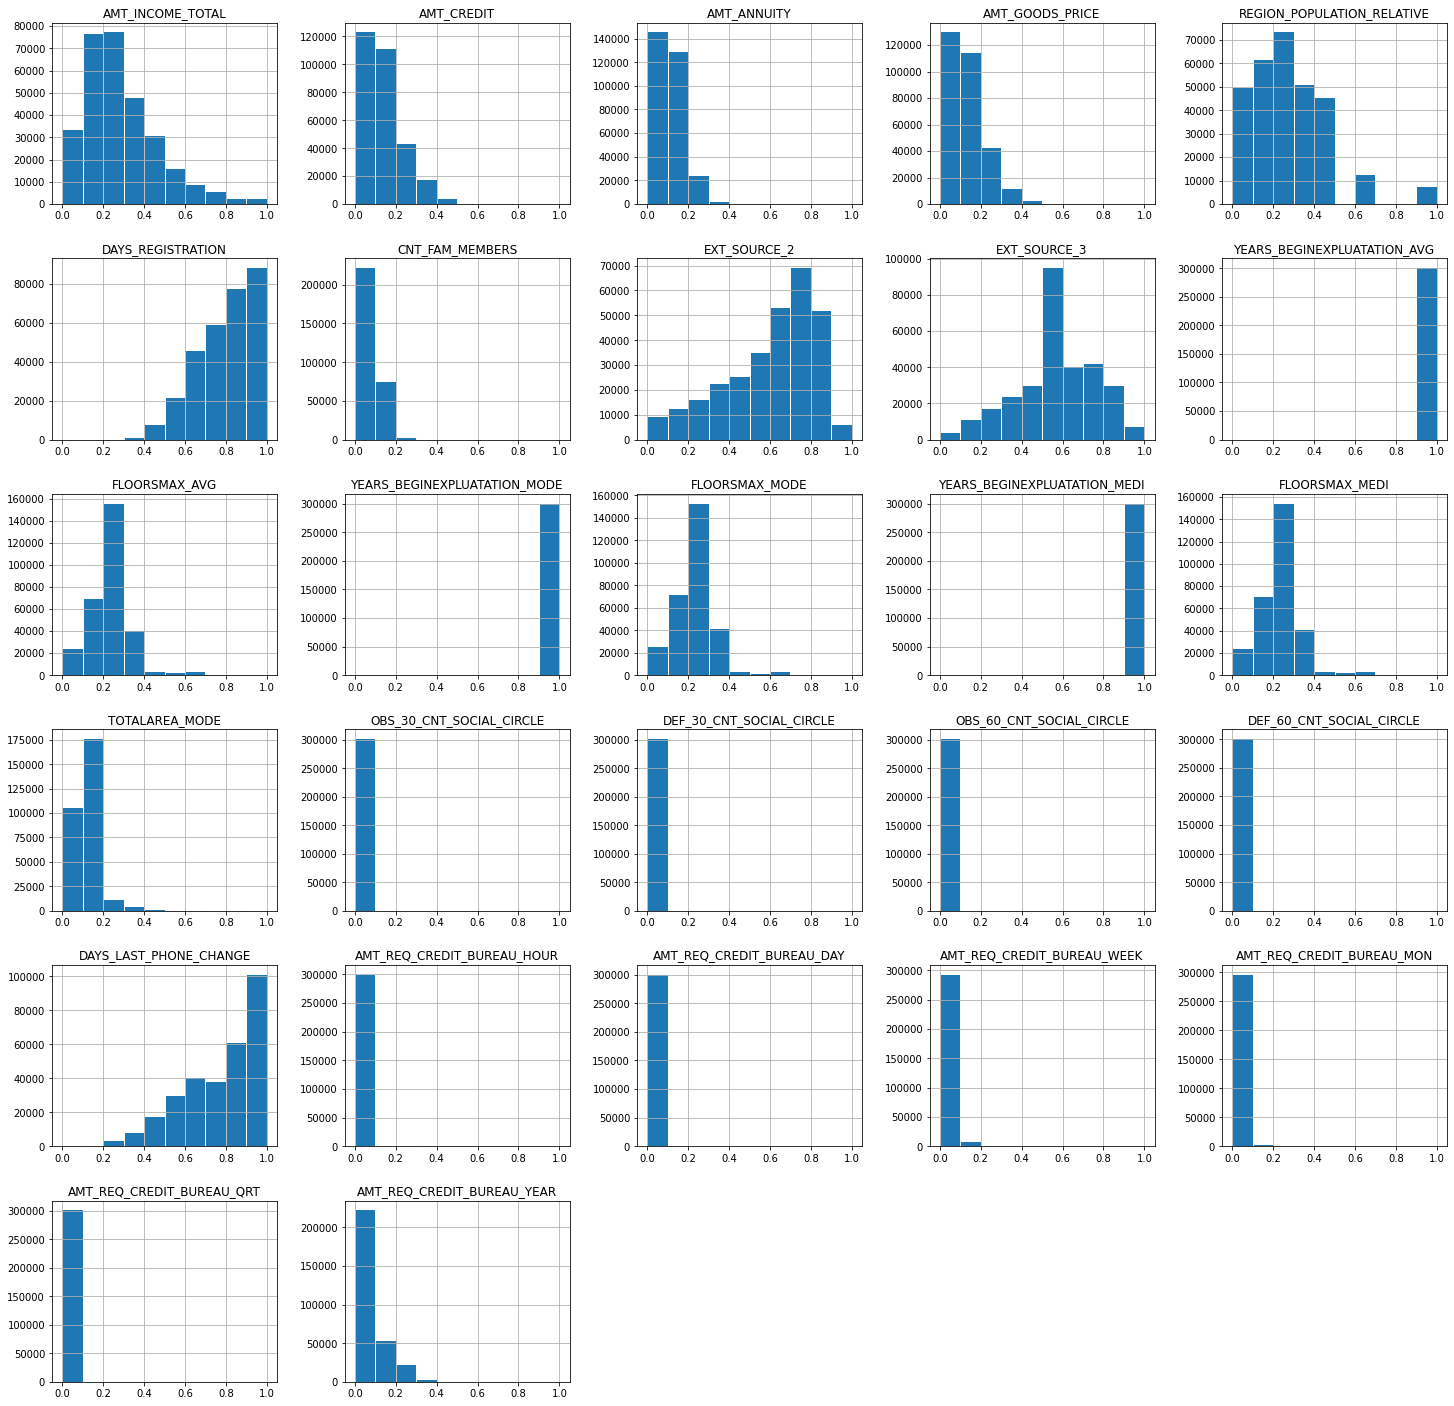

In [62]:
df_1.select_dtypes('float').hist(figsize=(25,25), ec='w')
plt.show() 

### Correlation

In [64]:
df_1.select_dtypes('float').corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.393941,0.467759,0.398111,0.178788,0.070438,0.035287,0.162249,-0.069059,0.012115,...,-0.030083,-2.489439e-02,-0.030679,-0.062592,0.002389,0.003242,6.704592e-03,0.063324,0.018260,0.049505
AMT_CREDIT,0.393941,1.000000,0.770664,0.986324,0.090496,0.006145,0.062721,0.126088,0.041826,0.003857,...,-0.020031,2.821212e-03,-0.022964,-0.075443,-0.003830,0.003673,-8.806636e-04,0.048199,0.015717,-0.043455
AMT_ANNUITY,0.467759,0.770664,1.000000,0.774036,0.107907,0.035215,0.075412,0.119915,0.029471,0.009200,...,-0.021093,-8.403390e-03,-0.022646,-0.065887,0.003823,0.001025,1.296468e-02,0.033701,0.010339,-0.007891
AMT_GOODS_PRICE,0.398111,0.986324,0.774036,1.000000,0.094071,0.007963,0.060762,0.134275,0.045597,0.004670,...,-0.020979,3.098997e-03,-0.023637,-0.078421,-0.003139,0.003989,-5.782049e-04,0.050047,0.016278,-0.045612
REGION_POPULATION_RELATIVE,0.178788,0.090496,0.107907,0.094071,1.000000,-0.055324,-0.024780,0.195125,-0.003495,-0.006130,...,0.008235,-8.431365e-03,0.004037,-0.045341,-0.001738,0.001226,-2.494708e-03,0.071377,-0.000795,0.002651
DAYS_REGISTRATION,0.070438,0.006145,0.035215,0.007963,-0.055324,1.000000,0.173680,-0.061436,-0.096206,0.007660,...,0.003781,9.606644e-03,0.005025,0.056845,-0.003130,-0.000616,-7.100076e-04,-0.011108,-0.001441,-0.023172
CNT_FAM_MEMBERS,0.035287,0.062721,0.075412,0.060762,-0.024780,0.173680,1.000000,-0.002481,-0.025069,0.005123,...,-0.002485,2.542878e-02,-0.004500,-0.026945,0.000343,-0.000977,-8.799748e-04,-0.007724,-0.004407,-0.026329
EXT_SOURCE_2,0.162249,0.126088,0.119915,0.134275,0.195125,-0.061436,-0.002481,1.000000,0.098191,0.005608,...,-0.030026,-1.798493e-02,-0.031896,-0.196377,-0.003353,0.000366,1.002680e-03,0.046931,-0.002502,-0.019890
EXT_SOURCE_3,-0.069059,0.041826,0.029471,0.045597,-0.003495,-0.096206,-0.025069,0.098191,1.000000,0.000070,...,-0.033032,-1.119240e-03,-0.030944,-0.069099,-0.001054,-0.006704,-1.991101e-02,-0.006887,-0.018555,-0.068320
YEARS_BEGINEXPLUATATION_AVG,0.012115,0.003857,0.009200,0.004670,-0.006130,0.007660,0.005123,0.005608,0.000070,1.000000,...,-0.002941,-2.917726e-04,-0.002707,0.002250,0.000364,-0.001508,2.366040e-03,-0.000679,0.001492,-0.005809


# Integer

In [65]:
int_columns = []
obj_columns = []
float_columns = []

for col in df_1.columns:
    col_type = df[col].dtype
    if str(col_type) == "int64":
        int_columns.append(col)
    elif str(col_type) == "object":
        obj_columns.append(col)
    else:
        float_columns.append(col)

In [66]:
print(len(int_columns), len(obj_columns), len(float_columns))

41 13 27


In [67]:
df_int = df_1.drop(columns=(obj_columns+float_columns))

In [68]:
# 3, 4, 5
normal_list = [1, 2, 3, 4, 13]
df_int.columns[normal_list]

Index(['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

In [69]:
for cols in df_int.columns[normal_list]:
    q_low = df_1[cols].quantile(0.01)
    q_hi  = df_1[cols].quantile(0.99)

    df_1.drop(df_1[df_1[cols] > q_hi].index, inplace=True)
    df_1.drop(df_1[df_1[cols] < q_low].index, inplace=True)
    

In [70]:
df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,0.368421,0.090287,0.101877,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
1,100003,0,Cash loans,F,N,N,0,0.526316,0.311736,0.151190,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,0.052632,0.022472,0.021388,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,0.210526,0.066837,0.124233,...,0,0,0,0,0.001601,0.000778,0.004295,0.009904,0.001017,0.075999
4,100007,0,Cash loans,M,N,Y,0,0.178947,0.116854,0.089165,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,0.263158,0.052360,0.114689,...,0,0,0,0,0.001601,0.000778,0.004295,0.009904,0.001017,0.075999
307507,456252,0,Cash loans,F,N,Y,0,0.063158,0.056067,0.044935,...,0,0,0,0,0.001601,0.000778,0.004295,0.009904,0.001017,0.075999
307508,456253,0,Cash loans,F,N,Y,0,0.252632,0.157969,0.125545,...,0,0,0,0,0.250000,0.000000,0.000000,0.037037,0.000000,0.040000
307509,456254,1,Cash loans,F,N,Y,0,0.294737,0.081175,0.081719,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
for col in df_int.columns[normal_list]:

    min_max_scaler = preprocessing.MinMaxScaler().fit(df_1[[col]])
    df_1[col]=min_max_scaler.transform(df_1[[col]])

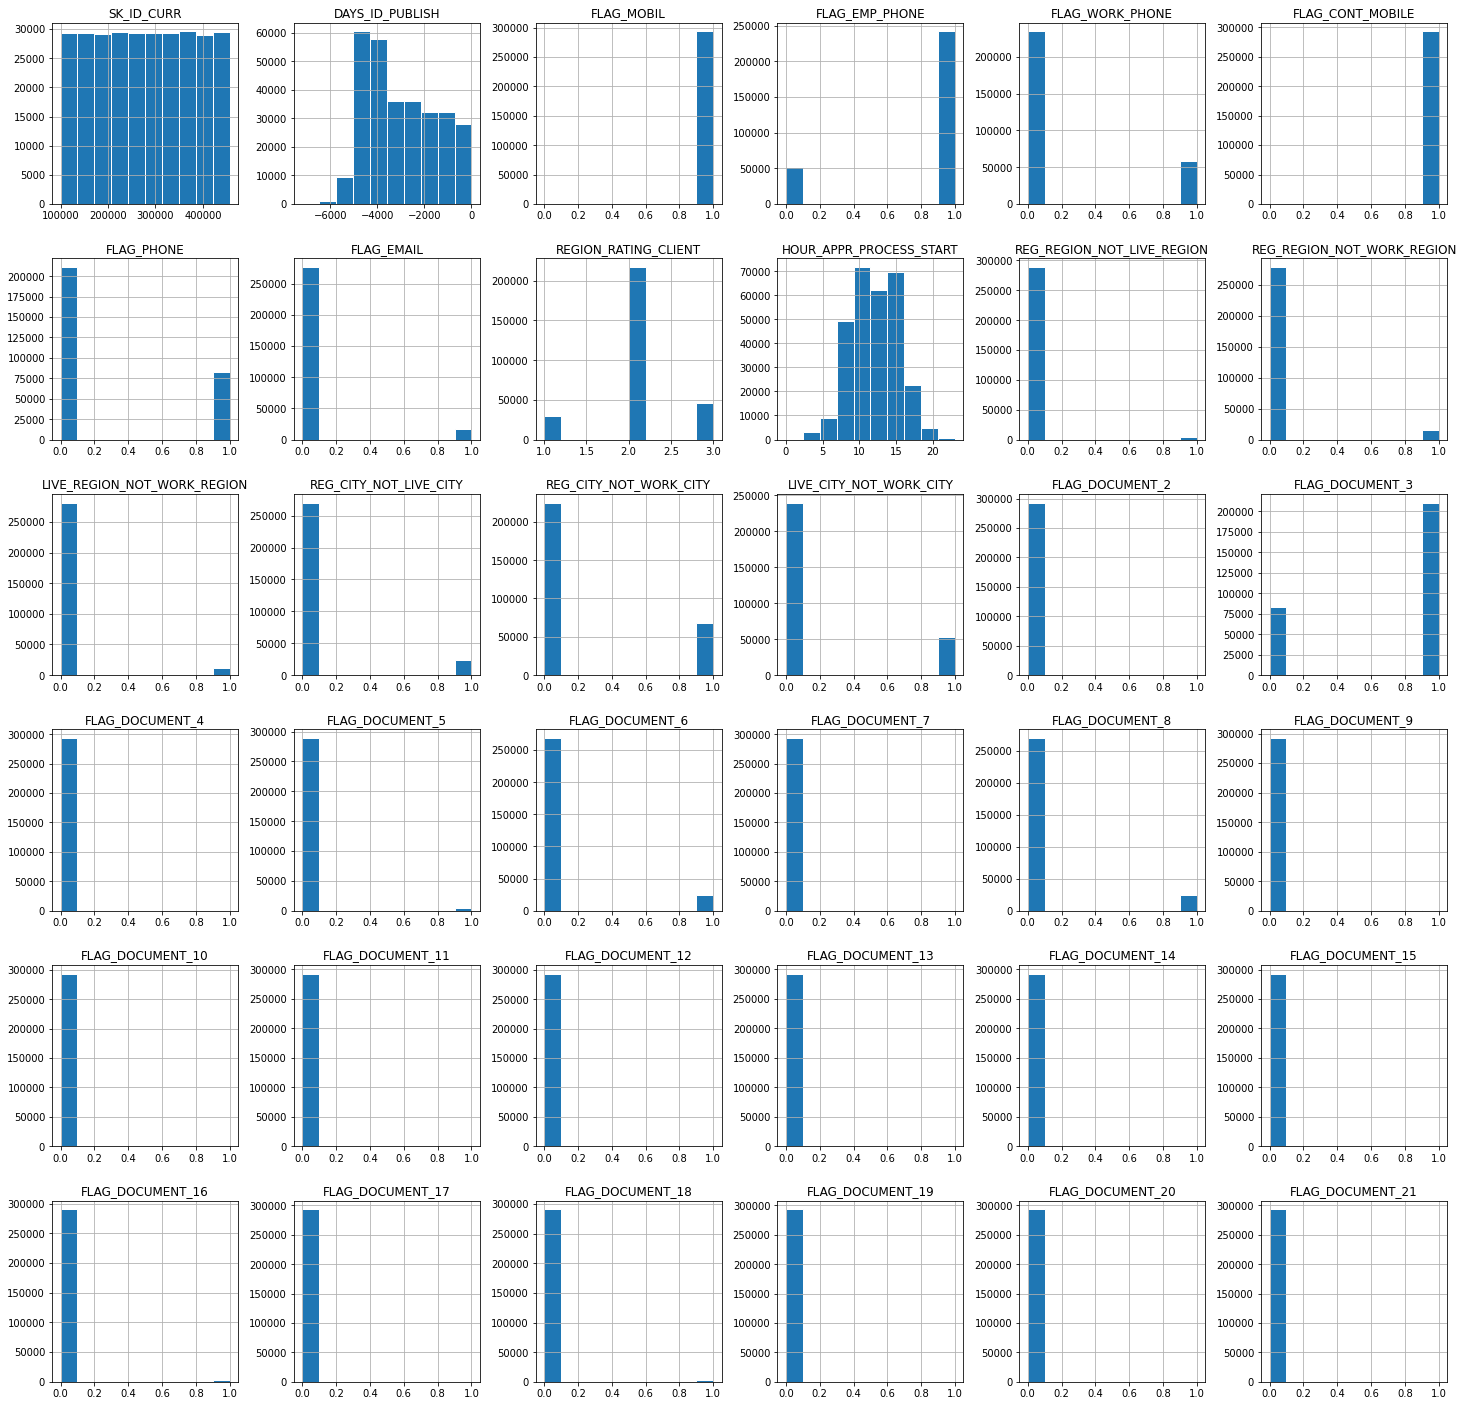

In [72]:
df_1.select_dtypes('integer').hist(figsize=(25,25), ec='w')
plt.show()

In [73]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293441 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    293441 non-null  int64  
 1   TARGET                        293441 non-null  float64
 2   NAME_CONTRACT_TYPE            293441 non-null  object 
 3   CODE_GENDER                   293441 non-null  object 
 4   FLAG_OWN_CAR                  293441 non-null  object 
 5   FLAG_OWN_REALTY               293441 non-null  object 
 6   CNT_CHILDREN                  293441 non-null  float64
 7   AMT_INCOME_TOTAL              293441 non-null  float64
 8   AMT_CREDIT                    293441 non-null  float64
 9   AMT_ANNUITY                   293441 non-null  float64
 10  AMT_GOODS_PRICE               293441 non-null  float64
 11  NAME_TYPE_SUITE               293441 non-null  object 
 12  NAME_INCOME_TYPE              293441 non-nul

In [74]:
df_1["TARGET"].value_counts()

0.0    269553
1.0     23888
Name: TARGET, dtype: int64

In [75]:
# Deal with class imbalance
rand_df = df_1[df_1["TARGET"] == 0].sample(frac =.9)

In [76]:
rand_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
268468,411120,0.0,Cash loans,F,Y,Y,0.333333,0.336842,0.269663,0.138620,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.003831,0.120000
280453,424924,0.0,Cash loans,F,N,Y,0.000000,0.842105,0.284385,0.146933,...,0,0,0,0,0.000000,0.000000,0.125000,0.185185,0.000000,0.040000
61280,171064,0.0,Cash loans,M,Y,N,0.000000,0.210526,0.157969,0.100262,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.003831,0.040000
17075,119916,0.0,Cash loans,M,Y,Y,0.666667,0.263158,0.022416,0.047135,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000
119977,239126,0.0,Cash loans,F,N,Y,0.000000,0.157895,0.374787,0.181739,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136395,258204,0.0,Cash loans,F,N,Y,0.000000,0.263158,0.136719,0.119532,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000
266121,408279,0.0,Cash loans,F,N,Y,0.000000,0.084211,0.022472,0.053733,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000
15305,117869,0.0,Cash loans,F,N,Y,0.000000,0.473684,0.142349,0.090759,...,0,0,0,0,0.001601,0.000778,0.004295,0.009904,0.001017,0.075999
91135,205837,0.0,Revolving loans,F,N,Y,0.666667,0.105263,0.056180,0.051655,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000


In [77]:
df_test = df_1.drop(rand_df.index)

In [78]:
df_test["TARGET"].value_counts()

0.0    26955
1.0    23888
Name: TARGET, dtype: int64

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50843 entries, 0 to 307509
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    50843 non-null  int64  
 1   TARGET                        50843 non-null  float64
 2   NAME_CONTRACT_TYPE            50843 non-null  object 
 3   CODE_GENDER                   50843 non-null  object 
 4   FLAG_OWN_CAR                  50843 non-null  object 
 5   FLAG_OWN_REALTY               50843 non-null  object 
 6   CNT_CHILDREN                  50843 non-null  float64
 7   AMT_INCOME_TOTAL              50843 non-null  float64
 8   AMT_CREDIT                    50843 non-null  float64
 9   AMT_ANNUITY                   50843 non-null  float64
 10  AMT_GOODS_PRICE               50843 non-null  float64
 11  NAME_TYPE_SUITE               50843 non-null  object 
 12  NAME_INCOME_TYPE              50843 non-null  object 
 13  

# Global dummy variable 

In [1]:
#dummy list using re-sampled data
dummy_list1 = []
non_numeric_cols = pd.Index(set(df_test.columns).difference(set(df_test.select_dtypes(include=(np.number)).columns)))
train_dummy_sampled = pd.get_dummies(df_test, columns=non_numeric_cols)


#dummy list using origin data
dummy_list2 = []
non_numeric_cols = pd.Index(set(df_1.columns).difference(set(df_1.select_dtypes(include=(np.number)).columns)))
train_dummy_origin =pd.get_dummies( df_1, columns=non_numeric_cols)


#withou any feature selection
features_w_target = train_dummy_sampled.columns
features_all = features_w_target.drop('TARGET')

#selected 10 features according to the information gain from the resampled data 
importance = mutual_info_classif(train_dummy_sampled, train_dummy_sampled['TARGET'])
feat_importance = pd.Series(importance, train_dummy_sampled.columns[0:])
features_top = []
for i in range(0,9):
    features_top.append(feat_importance.sort_values(ascending=False).index[i+1])

#selected 10 features according to the information gain from the origin data 
importance = mutual_info_classif(train_dummy_origin, train_dummy_origin['TARGET'])
feat_importance = pd.Series(importance, train_dummy_origin.columns[0:])
features_top = []
for i in range(0,9):
    features_top.append(feat_importance.sort_values(ascending=False).index[i+1])


NameError: name 'pd' is not defined

# Decision Tree

Model with original dataset

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# model with original dataset
dummy_list_decision_tree = []
non_numeric_cols = pd.Index(set(df_1.columns).difference(set(df_1.select_dtypes(include=(np.number)).columns)))
train_dummy_origin =pd.get_dummies( df_1, columns=non_numeric_cols)
train_dummy_origin.info(verbose=True)

features = list(train_dummy_origin.columns[1:])
target = ['TARGET']
X = train_dummy_origin[features]
y = train_dummy_origin[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
pred_val = decision_tree_model.predict(X_test)

score = cross_val_score(decision_tree_model,X_train,y_train,cv=10).mean()
score.mean()

predicted_Train = decision_tree_model.fit(X_train, y_train).predict(X_test)
print('Train Accuracy',round(decision_tree_model.score(X_train, y_train), 2))

predicted_Test = decision_tree_model.fit(X_test, y_test).predict(X_test)
print('Test Accuracy',round(decision_tree_model.score(X_test, y_test), 2))

decision_tree_preds = cross_val_predict(decision_tree_model,X_test,y_test,cv=10)
decision_tree_preds

# print the accuracy rate
print("Accuracy of Decision Tree Model:","\n", accuracy_score(y_test, decision_tree_preds, normalize=True, sample_weight=None))

# print the confusion matrix
print("Confusion Matrix of Decision Tree Model:", "\n", confusion_matrix(y_test, decision_tree_preds))
print("Decision Tree Model Classification Report:","\n", classification_report(y_test, decision_tree_preds))
print(precision_recall_fscore_support(y_test, decision_tree_preds, average='macro'))

#ROC 
decision_tree_pred_prob = decision_tree_model.predict_proba(X_test)
decision_tree_fpr, decision_tree_tpr, thresholds = roc_curve(y_test, decision_pred_prob[:,1], pos_label=1)
roc_auc=auc(decision_tree_fpr, decision_tree_tpr)

plt.figure()
lw = 2
plt.plot(decision_tree_fpr, decision_tree_tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Model with GridSearchCV()

In [ ]:
df_test_dummy = pd.get_dummies(df_test, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE'])
df_test = pd.get_dummies(df_test, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE'],drop_first = True)

features = list(df_test.columns[1:])
target = ['TARGET']
X = df_test[features]
y = df_test[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

depths = np.arange(6,13,2)
num_leafs_nodes = np.arange(10,61,10)
min_samples_leaf = np.arange(10,91,20)

grid = [{'max_depth':depths,'max_leaf_nodes':num_leafs_nodes, 'min_samples_leaf':min_samples_leaf}]

Model = GridSearchCV(DecisionTreeClassifier(), param_grid=grid, cv=10)
Model.fit(X_train,y_train)
Model.best_params_

In [ ]:
DT_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 40, min_samples_leaf = 30)
DT_model.fit(X_train,y_train)
pred_val = DT_model.predict(X_test)

score = cross_val_score(DT_model,X_train,y_train,cv=10).mean()
score.mean()

In [ ]:
df_test["TARGET"].value_counts()

In [ ]:
100 * df_test.TARGET.value_counts() / len(df_test.TARGET)

In [ ]:
df_test_dummy = pd.get_dummies(df_test, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE'])
df_test = pd.get_dummies(df_test, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE'],drop_first = True)

In [ ]:
df_test.info(verbose=True)

In [ ]:
# Build decision-tree model
features = list(df_test.columns[1:])
target = ['TARGET']

In [ ]:
X = df_test[features]
y = df_test[target]

In [ ]:
# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [ ]:
# Train dataset using Grid Search cross-validation
# Develop hyperparameter for decision tree clssifier
depths = np.arange(6,13,2)
num_leafs_nodes = np.arange(10,61,10)
min_samples_leaf = np.arange(10,91,20)
num_leafs_nodes


In [ ]:
# define a grid 
grid = [{'max_depth':depths,'max_leaf_nodes':num_leafs_nodes, 'min_samples_leaf':min_samples_leaf}]

In [ ]:
Model = GridSearchCV(DecisionTreeClassifier(), param_grid=grid, cv=10)

In [ ]:
Model.fit(X_train,y_train)

In [ ]:
Model.best_params_

In [ ]:
Model.best_score_

In [ ]:
DT_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 40, min_samples_leaf = 30)

In [ ]:
DT_model.fit(X_train,y_train)

In [ ]:
y_predict = DT_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)

In [ ]:
100 * df_test.TARGET.value_counts() / len(df_test.TARGET)

In [ ]:
print("Accuracy in training set:", Model.best_score_)
print("Accuracy in test set", accuracy_score(y_test, y_predict, normalize=True, sample_weight=None))

In [ ]:
print("Confusion Matrix of Decision Tree Model:", "\n", confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predict)

In [ ]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_predict))

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Navie Bayes

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.feature_selection import mutual_info_classif

In [ ]:
prior = df_1.groupby('TARGET').size().div(len(df_1)) #count()['Age']/len(data)
print(prior)
#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

#Resampled data
# rand_df = df_1[df_1["TARGET"] == 0].sample(frac =.9)
# df_re = df_1.drop(rand_df.index)


# model with the original data set

In [ ]:
X = train_dummy_origin [features_all]
y = train_dummy_origin ['TARGET']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
mnb.fit(X_train,y_train)

# Predict test set
test_pred = mnb.predict(X_test)

# Model Evaluation
score = cross_val_score(mnb,X_train,y_train,cv=10).mean()
print('Score: ',score.mean())

predicted_Train = mnb.fit(X_train, y_train).predict(X_test)
print('Train Accuracy',round(mnb.score(X_train, y_train), 2))

predicted_Test = mnb.fit(X_test, y_test).predict(X_test)
print('Test Accuracy',round(mnb.score(X_test, y_test), 2))

pred_y = cross_val_predict(mnb,X_train,y_train,cv=10)

# Do majority-class prediction (not accept: 0) -> Benchmark model
pred_val_maj = np.zeros((X_train.shape[0],),dtype=int)


# print the accurary rate
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_train, pred_val_maj, normalize=True, sample_weight=None))
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_train, pred_y, normalize=True, sample_weight=None))

# print the confusion matrix
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_train, pred_val_maj))
print("Benchmark Model Classification Report:","\n", classification_report(y_train, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_train, pred_y))
print("Naive Bayes Model Classification Report:","\n", classification_report(y_train, pred_y))
print(precision_recall_fscore_support(y_train, pred_y,average='macro'))

#ROC 
pred_prob = mnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=auc(fpr,tpr)

%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# model with the re-sampled data in which 90% of the target variable of “0” is dropped

In [ ]:
X = train_dummy_sampled [features_top]
y = train_dummy_sampled ['TARGET']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
mnb.fit(X_train,y_train)

# Predict test set
test_pred = mnb.predict(X_test)
test_pred

# Model Evaluation
score = cross_val_score(mnb,X_train,y_train,cv=10).mean()
score.mean()

predicted_Train = mnb.fit(X_train, y_train).predict(X_test)
print('Train Accuracy',round(mnb.score(X_train, y_train), 2))

predicted_Test = mnb.fit(X_test, y_test).predict(X_test)
print('Test Accuracy',round(mnb.score(X_test, y_test), 2))

pred_y = cross_val_predict(mnb,X_train,y_train,cv=10)
pred_y

# Do majority-class prediction (not accept: 0) -> Benchmark model
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.htm
pred_val_maj = np.zeros((X_train.shape[0],),dtype=int)


# print the accurary rate
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_train, pred_val_maj, normalize=True, sample_weight=None))
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_train, pred_y, normalize=True, sample_weight=None))

# print the confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_train, pred_val_maj))
print("Benchmark Model Classification Report:","\n", classification_report(y_train, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_train, pred_y))
print("Naive Bayes Model Classification Report:","\n", classification_report(y_train, pred_y))
print(precision_recall_fscore_support(y_train, pred_y,average='macro'))

#ROC 
pred_prob = mnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=auc(fpr,tpr)

%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# model with the top 10 data ranking by the information gain with the target variable and without resampling

In [ ]:

X = train_dummy_origin[features_top]
y = train_dummy_origin['TARGET']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
# Predict test set
test_pred = mnb.predict(X_test)
test_pred
# Model Evaluation
score = cross_val_score(mnb,X_train,y_train,cv=10).mean()
score.mean()
predicted_Train = mnb.fit(X_train, y_train).predict(X_test)
print('Train Accuracy',round(mnb.score(X_train, y_train), 2))
predicted_Test = mnb.fit(X_test, y_test).predict(X_test)
print('Test Accuracy',round(mnb.score(X_test, y_test), 2))
pred_y = cross_val_predict(mnb,X_train,y_train,cv=10)
pred_val_maj = np.zeros((X_train.shape[0],),dtype=int)
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_train, pred_val_maj))
print("Benchmark Model Classification Report:","\n", classification_report(y_train, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_train, pred_y))
print("Naive Bayes Model Classification Report:","\n", classification_report(y_train, pred_y))
print(precision_recall_fscore_support(y_train, pred_y,average='macro'))



#ROC 
pred_prob = mnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=auc(fpr,tpr)

%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# model with the top 10 data ranking by the information gain with the target variable and with resampling

In [ ]:

X = train_dummy_sampled [features_top]
y = train_dummy_sampled ['TARGET']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
mnb.fit(X_train,y_train)

# Predict test set
test_pred = mnb.predict(X_test)

# Model Evaluation
score = cross_val_score(mnb,X_train,y_train,cv=10).mean()
score.mean()

predicted_Train = mnb.fit(X_train, y_train).predict(X_test)
print('Train Accuracy',round(mnb.score(X_train, y_train), 2))

predicted_Test = mnb.fit(X_test, y_test).predict(X_test)
print('Test Accuracy',round(mnb.score(X_test, y_test), 2))

pred_y = cross_val_predict(mnb,X_train,y_train,cv=10)
pred_y

# Do majority-class prediction (not accept: 0) -> Benchmark model
pred_val_maj = np.zeros((X_train.shape[0],),dtype=int)


# print the accurary rate
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_train, pred_val_maj, normalize=True, sample_weight=None))
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_train, pred_y, normalize=True, sample_weight=None))

# print the confusion matrix
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_train, pred_val_maj))
print("Benchmark Model Classification Report:","\n", classification_report(y_train, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_train, pred_y))
print("Naive Bayes Model Classification Report:","\n", classification_report(y_train, pred_y))
print(precision_recall_fscore_support(y_train, pred_y,average='macro'))

#ROC 
pred_prob = mnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
roc_auc=auc(fpr,tpr)

%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

dummy_list = []
non_numeric_cols = pd.Index(set(df_test.columns).difference(set(df_test.select_dtypes(include=(np.number)).columns)))
train_dummy_sampled = pd.get_dummies(df_test, columns=non_numeric_cols)

X = train_dummy_sampled[features_all]
y = train_dummy_sampled['TARGET']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_lr = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# build logistic model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
# fit model to training set
logistic_model.fit(X_train, y_train)

# predict test set with model
predictions = logistic_model.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 
%matplotlib inline

## Measuring Model Performance
- Model with original dataset

In [1]:
dummy_list = []
non_numeric_cols = pd.Index(set(df_1.columns).difference(set(df_1.select_dtypes(include=(np.number)).columns)))
train_dummy =pd.get_dummies( df_1, columns=non_numeric_cols)

# define independent attributes 
features = []
for i in train_dummy.columns:
    if i != 'TARGET':
        features.append(i)

X = train_dummy [features]
y = train_dummy ['TARGET']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
logistic_model.fit(X_train,y_train)

# Predict test set
predictions = logistic_model.predict(X_test)
predictions

# Model Evaluation
score = cross_val_score(logistic_model,X_train,y_train,cv=10).mean()
score.mean()

predicted_Train = logistic_model.fit(X_train, y_train).predict(X_test)
print('Train Accuracy',round(logistic_model.score(X_train, y_train), 2))

predicted_Test = logistic_model.fit(X_test, y_test).predict(X_test)
print('Test Accuracy',round(logistic_model.score(X_test, y_test), 2))

logistic_preds = cross_val_predict(logistic_model,X_test,y_test,cv=10)
logistic_preds

# print the accuracy rate
print("Accuracy of Logistic Regression Model:","\n", accuracy_score(y_test, logistic_preds, normalize=True, sample_weight=None))

# print the confusion matrix
print("Confusion Matrix of Logistic Regression Model:", "\n", confusion_matrix(y_test, logistic_preds))
print("Logistic Regression Model Classification Report:","\n", classification_report(y_test, logistic_preds))
print(precision_recall_fscore_support(y_test, logistic_preds, average='macro'))

#ROC 
logistic_pred_prob = logistic_model.predict_proba(X_test)
logistic_fpr, logistic_tpr, thresholds = roc_curve(y_test, logistic_pred_prob[:,1], pos_label=1)
roc_auc=auc(logistic_fpr, logistic_tpr)

plt.figure()
lw = 2
plt.plot(logistic_fpr, logistic_tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

NameError: ignored